In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

## Merge the `reading` and `weather` datasets

In [3]:
readings=pd.read_csv('readings.csv')
print(readings.shape)
readings.head()

(8475, 10)


,Date,NumMosquitos,Month,Year,DayRunner,Virus,pipiens,restuans,bad_block,spray
0,2007-05-29,1,5,2007,149,0,1,1,1,0
1,2007-05-29,1,5,2007,149,0,0,1,1,0
2,2007-05-29,1,5,2007,149,0,0,1,1,0
3,2007-05-29,1,5,2007,149,0,1,1,1,0
4,2007-05-29,4,5,2007,149,0,0,1,1,0


In [4]:
weather=pd.read_csv('weather2.csv')
print(weather.shape)
weather.head()

(1472, 8)


,Date,Tmax,Tmin,rainy,dry,Dry_Wet_Diff,Slowdown,Speedy
0,2007-05-01,84,52,0,1,1,1,0
1,2007-05-02,60,43,0,1,0,0,1
2,2007-05-03,67,48,0,1,1,0,1
3,2007-05-04,78,51,1,1,1,1,1
4,2007-05-05,66,54,0,1,1,0,1


In [5]:
chicago=pd.merge(readings, weather, on='Date').drop('Date', axis=1);
print(chicago.shape)
chicago.head()

(8475, 16)


,NumMosquitos,Month,Year,DayRunner,Virus,pipiens,restuans,bad_block,spray,Tmax,Tmin,rainy,dry,Dry_Wet_Diff,Slowdown,Speedy
0,1,5,2007,149,0,1,1,1,0,88,65,0,0,1,1,0
1,1,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0
2,1,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0
3,1,5,2007,149,0,1,1,1,0,88,65,0,0,1,1,0
4,4,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0


## Examine Association of Features with Outcome

11.747817410825641
89.37636761487965


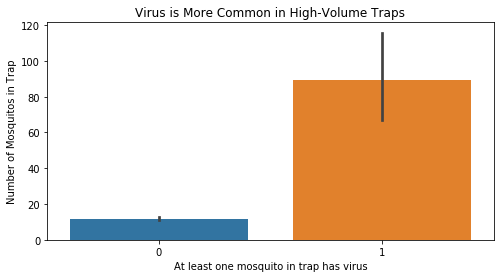

In [6]:
# Number of Mosquitoes in the Trap
print(chicago.loc[chicago['Virus']==0]['NumMosquitos'].mean())
print(chicago.loc[chicago['Virus']==1]['NumMosquitos'].mean())
ax = plt.figure(figsize=(8,4))
ax=sns.barplot(x='Virus', y='NumMosquitos', data=chicago);
ax.set(ylabel='Number of Mosquitos in Trap', xlabel='At least one mosquito in trap has virus', 
       Title='Virus is More Common in High-Volume Traps');

[Text(0,0.5,'Percent of Traps with Virus'),
 Text(0.5,1,'August is the Worst Month')]

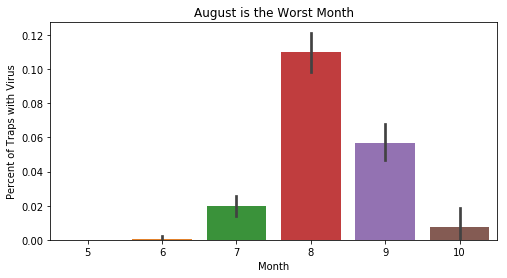

In [7]:
# Month
ax=plt.figure(figsize=(8,4))
ax=sns.barplot(x='Month', y='Virus', data=chicago)
ax.set(ylabel='Percent of Traps with Virus', Title='August is the Worst Month')

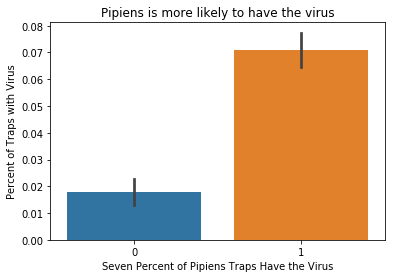

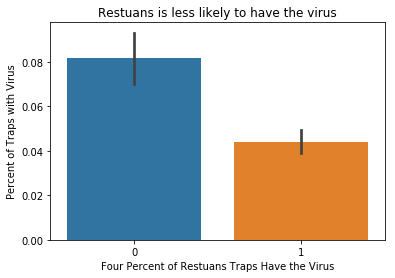

In [8]:
# species of mosquito
ax=sns.barplot(x='pipiens', y='Virus', data=chicago)
ax.set(ylabel='Percent of Traps with Virus', xlabel='Seven Percent of Pipiens Traps Have the Virus',
      title='Pipiens is more likely to have the virus')
plt.show()
ax=sns.barplot(x='restuans', y='Virus', data=chicago)
ax.set(ylabel='Percent of Traps with Virus', xlabel='Four Percent of Restuans Traps Have the Virus',
      title='Restuans is less likely to have the virus')
plt.show()

Percent of bad blocks with Virus: 0.057578430137331486


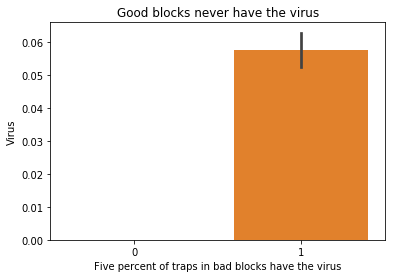

In [9]:
# Bad Block
print('Percent of bad blocks with Virus:', chicago[chicago['bad_block']==1]['Virus'].mean())
ax=sns.barplot(x='bad_block', y='Virus', data=chicago);
ax.set(title='Good blocks never have the virus', xlabel='Five percent of traps in bad blocks have the virus');

Percent of Readings inside Spray Period with Virus: 0.12317961165048544
Percent of Readings outside Spray Period with Virus: 0.03720521458913139


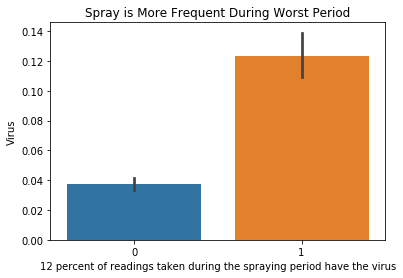

In [10]:
# Spray
print('Percent of Readings inside Spray Period with Virus:', chicago[chicago['spray']==1]['Virus'].mean())
print('Percent of Readings outside Spray Period with Virus:', chicago[chicago['spray']==0]['Virus'].mean())
ax=sns.barplot(x='spray', y='Virus', data=chicago);
ax.set(title='Spray is More Frequent During Worst Period', 
       xlabel='12 percent of readings taken during the spraying period have the virus');

81.60987777500624
83.89496717724289


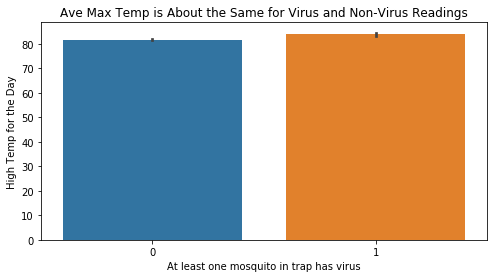

In [11]:
# High Temperature
print(chicago.loc[chicago['Virus']==0]['Tmax'].mean())
print(chicago.loc[chicago['Virus']==1]['Tmax'].mean())
ax = plt.figure(figsize=(8,4))
ax=sns.barplot(x='Virus', y='Tmax', data=chicago);
ax.set(ylabel='High Temp for the Day', xlabel='At least one mosquito in trap has virus', 
       Title='Ave Max Temp is About the Same for Virus and Non-Virus Readings');

63.885008730356695
66.87527352297593


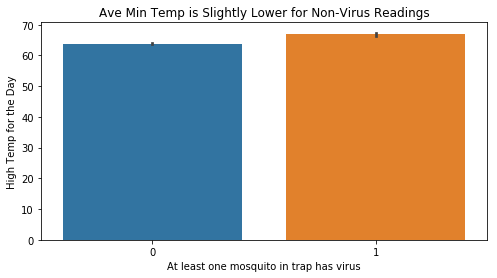

In [12]:
# High Temperature
print(chicago.loc[chicago['Virus']==0]['Tmin'].mean())
print(chicago.loc[chicago['Virus']==1]['Tmin'].mean())
ax = plt.figure(figsize=(8,4))
ax=sns.barplot(x='Virus', y='Tmin', data=chicago);
ax.set(ylabel='High Temp for the Day', xlabel='At least one mosquito in trap has virus', 
       Title='Ave Min Temp is Slightly Lower for Non-Virus Readings');

Percent of Readings  with Virus on Rainy Days: 0.055135475740390676
Percent of Readings  with Virus on Non-Rainy Days: 0.05319750990379174


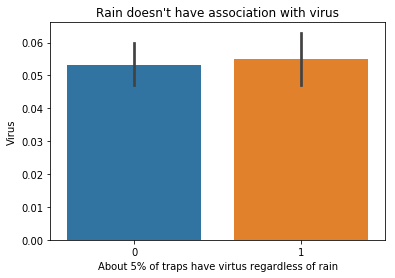

In [13]:
# Rain
print('Percent of Readings  with Virus on Rainy Days:', chicago[chicago['rainy']==1]['Virus'].mean())
print('Percent of Readings  with Virus on Non-Rainy Days:', chicago[chicago['rainy']==0]['Virus'].mean())
ax=sns.barplot(x='rainy', y='Virus', data=chicago);
ax.set(title="Rain doesn't have association with virus", 
       xlabel='About 5% of traps have virtus regardless of rain');

In [14]:
chicago['dry'].value_counts()

0    6842
1    1633
Name: dry, dtype: int64

Percent of Readings  with Virus on dry Days: 0.011022657685241886
Percent of Readings  with Virus on Non-dry Days: 0.06416252557731657


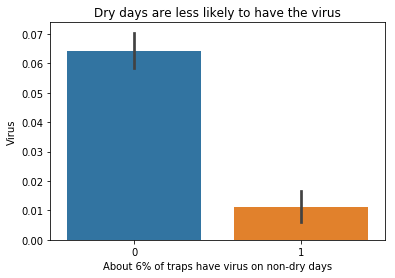

In [17]:
# Dry
print('Percent of Readings  with Virus on dry Days:', chicago[chicago['dry']==1]['Virus'].mean())
print('Percent of Readings  with Virus on Non-dry Days:', chicago[chicago['dry']==0]['Virus'].mean())
ax=sns.barplot(x='dry', y='Virus', data=chicago);
ax.set(title="Dry days are less likely to have the virus", 
      xlabel='About 6% of traps have virus on non-dry days');

Percent of Readings  with Virus on Dry_Wet_Diff Days: 0.040762463343108506
Percent of Readings  with Virus on Non-Dry_Wet_Diff Days: 0.06278381046396841


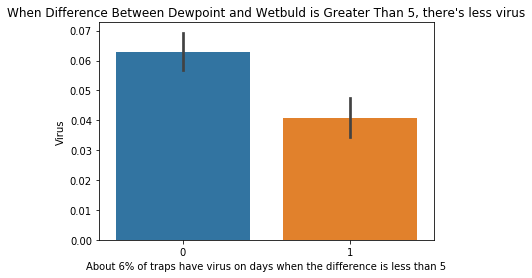

In [21]:
# Dry_Wet_Diff
print('Percent of Readings  with Virus on Dry_Wet_Diff Days:', chicago[chicago['Dry_Wet_Diff']==1]['Virus'].mean())
print('Percent of Readings  with Virus on Non-Dry_Wet_Diff Days:', chicago[chicago['Dry_Wet_Diff']==0]['Virus'].mean())
ax=sns.barplot(x='Dry_Wet_Diff', y='Virus', data=chicago);
ax.set(title="When Difference Between Dewpoint and Wetbuld is Greater Than 5, there's less virus", 
      xlabel='About 6% of traps have virus on days when the difference is less than 5');

Percent of Readings  with Virus on Slowdown Days: 0.05508952047076499
Percent of Readings  with Virus on Non-Slowdown Days: 0.03483606557377049


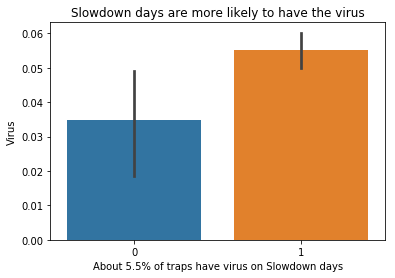

In [24]:
# Slowdown: All the days where “ResultSpeed” value is less than “11” 
print('Percent of Readings  with Virus on Slowdown Days:', chicago[chicago['Slowdown']==1]['Virus'].mean())
print('Percent of Readings  with Virus on Non-Slowdown Days:', chicago[chicago['Slowdown']==0]['Virus'].mean())
ax=sns.barplot(x='Slowdown', y='Virus', data=chicago);
ax.set(title="Slowdown days are more likely to have the virus", 
      xlabel='About 5.5% of traps have virus on Slowdown days');

Percent of Readings  with Virus on Speedy Days: 0.024302430243024302
Percent of Readings  with Virus on Non-Speedy Days: 0.058392178164041283


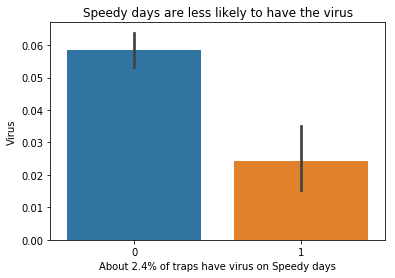

In [26]:
# Speedy: All the days where  “AvgSpeed” value is greater than “10”
print('Percent of Readings  with Virus on Speedy Days:', chicago[chicago['Speedy']==1]['Virus'].mean())
print('Percent of Readings  with Virus on Non-Speedy Days:', chicago[chicago['Speedy']==0]['Virus'].mean())
ax=sns.barplot(x='Speedy', y='Virus', data=chicago);
ax.set(title="Speedy days are less likely to have the virus", 
      xlabel='About 2.4% of traps have virus on Speedy days');